<a href="https://colab.research.google.com/github/JoshK68/analyzing_Walmart_inventory/blob/main/Analyzing_Walmart_inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Today we will wrangle and analyze data to optimize Walmart inventory.
#This work is motivated by the publication https://arxiv.org/pdf/2010.02503.pdf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
X_train = pd.read_csv('/content/drive/My Drive/Datasets/week_2/X_train.csv')
X_test = pd.read_csv('/content/drive/My Drive/Datasets/week_2/X_test.csv')
X_train.head()

NumOfEventsInJourney  NumSessions  ...  Weekend  Purchase
0                     1            1  ...        0         0
1                     1            1  ...        0         0
2                     1            1  ...        0         0
3                     1            1  ...        0         0
4                     1            1  ...        0         0

[5 rows x 15 columns]

In [6]:
#Let's identify the datatype for each feature to discover which ones are non-numeric

In [7]:
X_train.dtypes

NumOfEventsInJourney      int64
NumSessions               int64
interactionTime         float64
maxPrice                float64
minPrice                float64
NumCart                   int64
NumView                   int64
InsessionCart             int64
InsessionView             int64
year                      int64
month                     int64
weekday                  object
timeOfDay                object
Weekend                   int64
Purchase                  int64
dtype: object

In [8]:
#For the non-numeric columns (objects) let's identify the unique values.

print('Unique values of feature "weekday": ', X_train['weekday'].unique())
print('Unique values of feature "timeOfDay": ', X_train['timeOfDay'].unique())

Unique values of feature "weekday":  ['Sat' 'Fr' 'Thu' 'Mon' 'Tue' 'Wed' 'Sun']
Unique values of feature "timeOfDay":  ['Morning' 'Dawn' 'Afternoon' 'Noon' 'Evening' 'EarlyMorning' 'Night']


In [9]:
X_train['weekday'] = X_train.weekday.astype(object)

In [10]:
###Was getting the error: Cannot compare types 'ndarray(dtype=int64)' and 'str'
###Solved it by converting to object: https://stackoverflow.com/questions/53478932/cannot-compare-types-ndarraydtype-int64-and-str

In [11]:
#Let's convert the non-numberic features to numeric
#A couple quick ways to do this are with #1 mapping #2 .replace

X_train['weekday'] = X_train['weekday'].replace(['Mon','Tue','Wed','Thu','Fr','Sat','Sun'],[1,2,3,4,5,6,7])
X_train['timeOfDay'] = X_train['timeOfDay'].replace(['Dawn','EarlyMorning','Morning','Noon','Afternoon','Evening','Night'],[1,2,3,4,5,6,7])

print(X_train.shape)
X_train.head()

(645816, 15)


NumOfEventsInJourney  NumSessions  ...  Weekend  Purchase
0                     1            1  ...        0         0
1                     1            1  ...        0         0
2                     1            1  ...        0         0
3                     1            1  ...        0         0
4                     1            1  ...        0         0

[5 rows x 15 columns]

Determine the proportion of user trips which resulted in purchases

In [12]:
print(f'Proportion of transactions resulting in a purchase in the training set: {np.sum(X_train.iloc[:, -1])/len(X_train)}')
print(f'Proportion of transactions resulting in a purchase in the testing set:  {np.sum(X_test.iloc[:,-1])/len(X_test)}')

Proportion of transactions resulting in a purchase in the training set: 0.013900244032355966
Proportion of transactions resulting in a purchase in the testing set:  0.01421457504924003


In [13]:
#Inspecting the results shows that the datasets are imbalanced. Let's solve this.

In [14]:
import matplotlib.pyplot as plt
print(f'The training data currently has {X_train.shape[1]} features')

The training data currently has 15 features


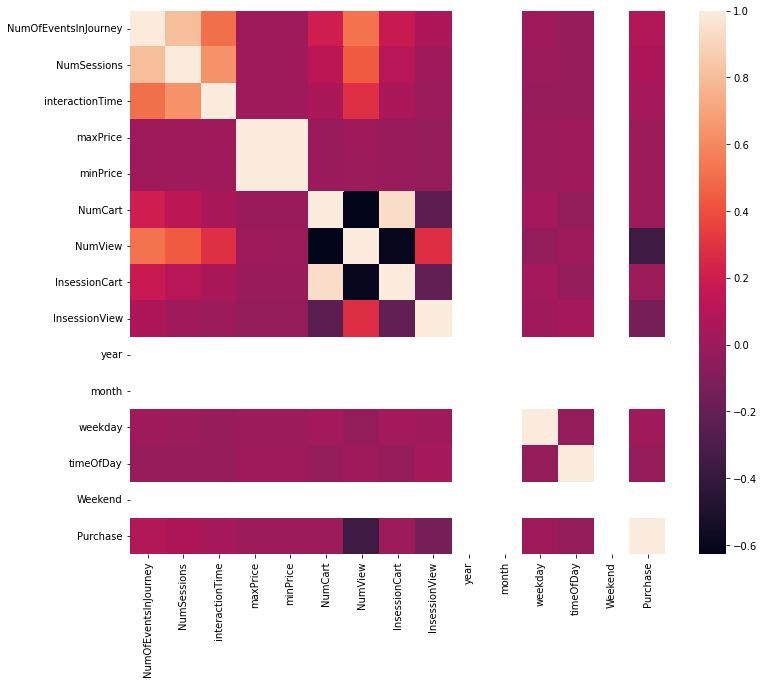

In [15]:
###Visually inspect the features
plt.figure(figsize=(12,10))

#Compute the Pearson correlation for each X_train feature
cor = X_train.corr()

sns.heatmap(cor)
plt.show()

In [16]:
#Fill (replace) NaN values in the correlation matrix with 1. We do this so that when we filter on large correlations, these associated features (with no variance) can also be removed at the same time

In [17]:
cor = cor.fillna(1)

Drop features with high correlations

In [18]:
#Store the remaining set of features (the ones we didn't drop) in dfs X_train_reduced and X_test_reduced

In [19]:
keep_columns = np.full((cor.shape[0],), True, dtype=bool)

for i in range(cor.shape[0]-1):

  for j in range(i+1, cor.shape[0]-1):
    if (np.abs(cor.iloc[i,j]) >= 0.8):
      if keep_columns[j]:
        keep_columns[j] = False

selected_columns = X_train.columns[keep_columns]

X_train_reduced = X_train[selected_columns]
X_test_reduced = X_test[selected_columns]

print('THe following columns are present in the new data: ')
print(selected_columns)
print(f'The old data had {X_train.shape[1]} features. The new df has {X_train_reduced.shape[1]} features.')
X_train_reduced.head()


THe following columns are present in the new data: 
Index(['NumOfEventsInJourney', 'interactionTime', 'maxPrice', 'NumCart',
       'NumView', 'InsessionView', 'Purchase'],
      dtype='object')
The old data had 15 features. The new df has 7 features.


NumOfEventsInJourney  interactionTime  ...  InsessionView  Purchase
0                     1              0.0  ...              1         0
1                     1              0.0  ...              1         0
2                     1              0.0  ...              1         0
3                     1              0.0  ...              1         0
4                     1              0.0  ...              1         0

[5 rows x 7 columns]

Visualize the selected features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

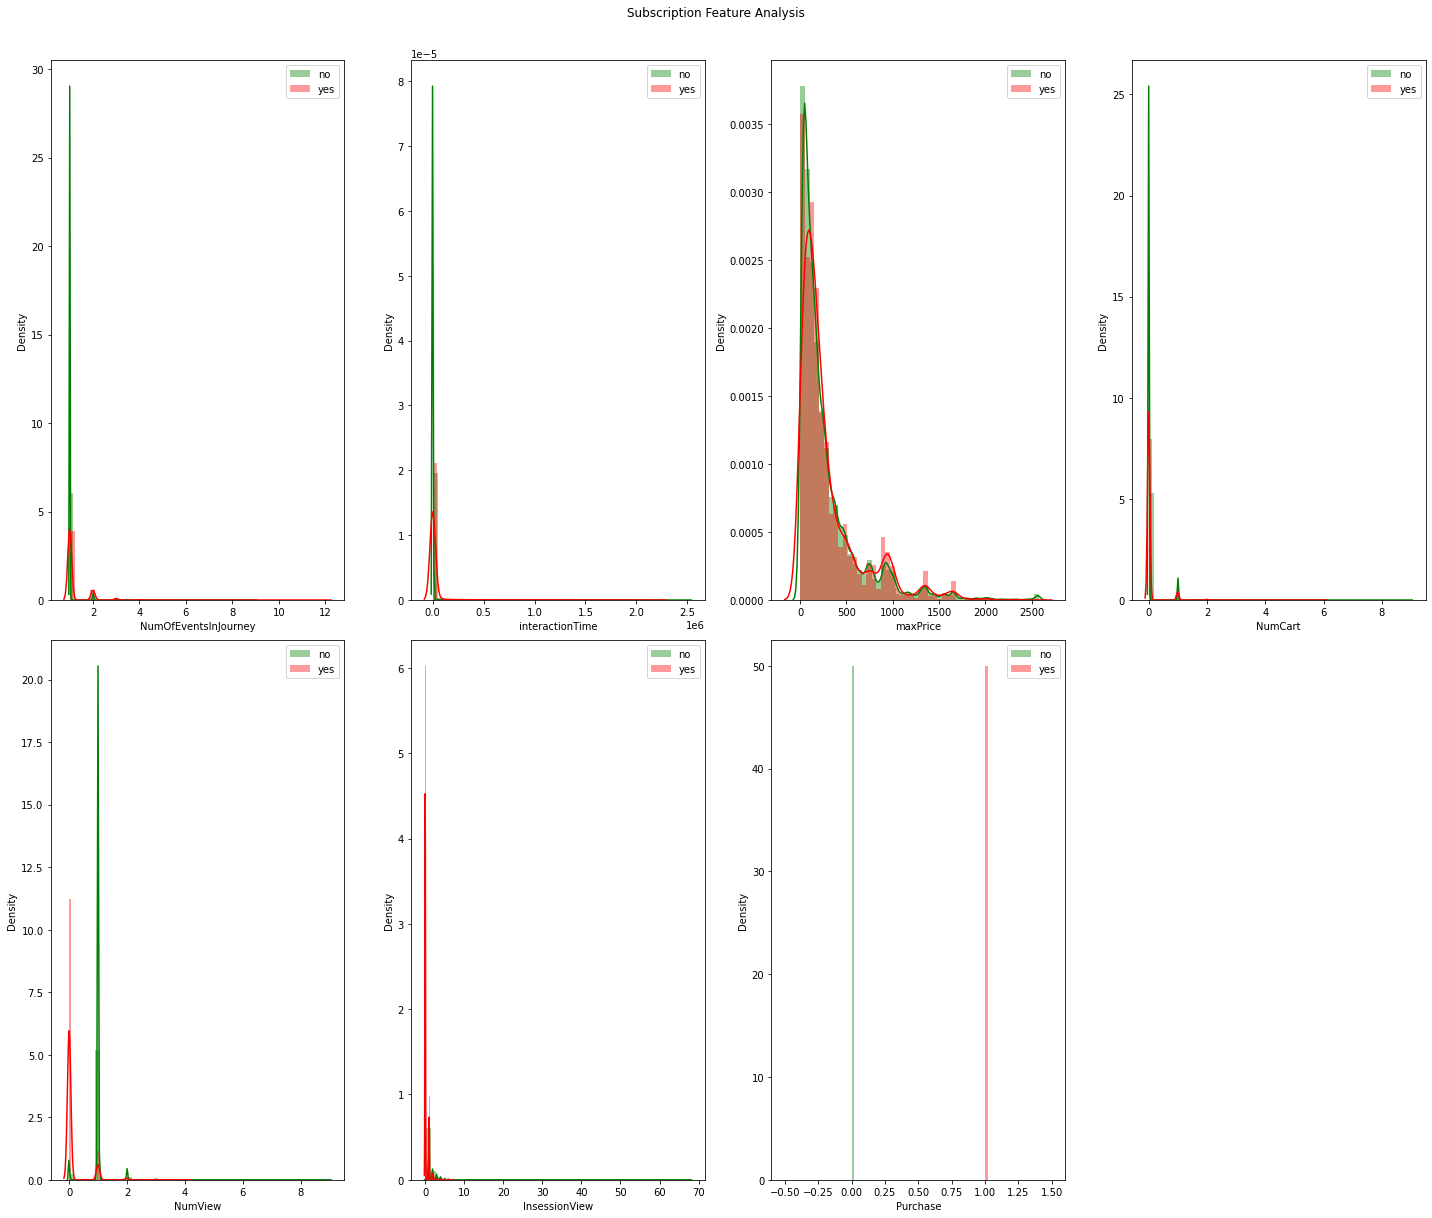

In [20]:
fig = plt.figure(figsize = (20,25))
j = 0
for i in X_train_reduced.columns:
  plt.subplot(3, 4, j+1)
  j+= 1
  sns.distplot(X_train_reduced[i][X_train_reduced['Purchase']==0], color='g', label='no')
  sns.distplot(X_train_reduced[i][X_train_reduced['Purchase']==1], color='r', label = 'yes')
  plt.legend(loc='best')

fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Extract the "Purchase" column from X_train_reduced and X_test_reduced, and make these NumPy arrays y_train and y_test. These are the classification targets. Also cast X_train_reduced and X_test_reduced to Numpy Arrays (this is the data type the modules I use below expect).

In [21]:
###
y_train = X_train_reduced['Purchase'].values
y_test = X_test_reduced['Purchase'].values
X_train_reduced = X_train_reduced.drop(columns='Purchase').values
X_test_reduced = X_test_reduced.drop(columns='Purchase').values

Finally, I scale the remaining features in X_train_reduced and X_test_reduced so that the max norm of each feature is 1.

In [22]:
###
from sklearn.preprocessing import normalize  # you can use this module, (but you don't have to)
### START CODE HERE ###
X_train_reduced = normalize(X_train_reduced, axis=0, norm='max')
X_test_reduced = normalize(X_test_reduced, axis=0, norm='max')
### END CODE HERE ###

Rank features by their Gini important (RF)

Feature ranking: 
1. feature 3 (0.593589)
2. feature 4 (0.304705)
3. feature 5 (0.057665)
4. feature 0 (0.037141)
5. feature 1 (0.004846)
6. feature 2 (0.002053)


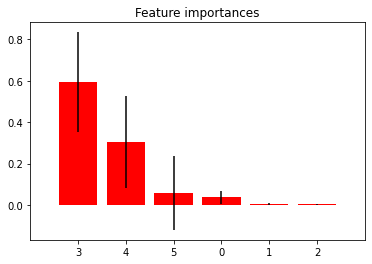

In [28]:
#Use Random Forest to get feature ranks/importance for each feature

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=32)


forest.fit(X_train_reduced, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
              axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking: ')

for f in range(X_train_reduced.shape[1]):
  print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title('Feature importances')
plt.bar(range(X_train_reduced.shape[1]), importances[indices],
              color='r', yerr=std[indices], align='center')
plt.xticks(range(X_train_reduced.shape[1]), indices)
plt.xlim([-1, X_train_reduced.shape[1]])
plt.show()


In [29]:
#Thus, according to Random Forest, features 3 and 4 (numcart, numview) are the top two most important features.
#Let's use these two features, along with interaction time (feature 1) to visualize the data.
#We'll fit using all 6 of the features.

In [31]:
#Convenience function for the visualization with numcart and numview features

In [32]:
# This function visualizes the classification output on a scatter plot,
# indicating the 4 times of outputs in a confusion matrix 
# (True Positive, True Negative, False Negative, False Positive)

from mpl_toolkits import mplot3d

def visualize_scatter_plot(X, y, yhat, title):

  loc11=np.where((y>0) & (yhat>0), 1,0) #TP
  loc00=np.where((y==0) & (yhat==0), 1,0) #TN
  loc10 = np.where((y>0) & (yhat==0), 1,0) #FN
  loc01 = np.where((y==0) & (yhat>0),1,0) #FP

  fig = plt.figure(figsize=(10,7))
  ax = plt.axes(projection='3d')
  ax.scatter3D(X[np.where(loc00>0),3],X[np.where(loc00>0),4],X[np.where(loc00>0),1],color='blue', marker='o')
  ax.scatter3D(X[np.where(loc10>0),3],X[np.where(loc10>0),4],X[np.where(loc10>0),1],color='cyan', marker='o')
  ax.scatter3D(X[np.where(loc11>0),3],X[np.where(loc11>0),4],X[np.where(loc11>0),1],color='red', marker='^')
  ax.scatter3D(X[np.where(loc01>0),3],X[np.where(loc01>0),4],X[np.where(loc01>0),1],color='green', marker='^')

  ax.set_xlabel('NumCart')
  ax.set_ylabel('NumViews')
  ax.set_zlabel('InteractionTime')
  plt.title(title)
  plt.show()


Task 3. Fit both Logistic Regression and an SVM model to the reduced features. Report for each method classification metrics such as Accuracy, Precision, Recall, and F1-score

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing  import StandardScaler
from sklearn.svm import LinearSVC

Instantiate, train and predict with a Logistic Regression model

In [37]:
###
regb = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train_reduced, y_train)
reg_predb = regb.predict(X_test_reduced)

Accuracy = 0.9990268125905831, Precision=0.9440722854027107, Recall, = 0.9901960784313726, F1_score = 0.9665842571177925
Confusion Matrix is: 
[[424065    359]
 [    60   6060]]


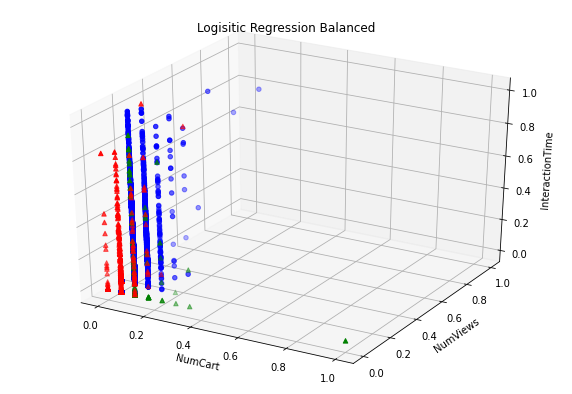

In [39]:
cmlog = confusion_matrix(y_test, reg_predb)
acc = accuracy(y_test, reg_predb)
rec = recall(y_test, reg_predb)
prec = precision(y_test, reg_predb)
f1 = f1_score(y_test, reg_predb)

print(f'Accuracy = {acc}, Precision={prec}, Recall, = {rec}, F1_score = {f1}')
print('Confusion Matrix is: ')
print(cmlog)
visualize_scatter_plot(X_test_reduced, y_test, reg_predb, 'Logisitic Regression Balanced')

Instantiate, train and predict with the SVM model

In [40]:
svmm = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-2, class_weight='balanced'))
svmm.fit(X_train_reduced, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(class_weight='balanced', random_state=0, tol=0.01))])

 Accuracy = 0.9997932847746107, Precision = 0.9952373131877156, Recall = 0.9901960784313726, F1 = 0.9927102956835121
Confusion Matrix is:
[[424395     29]
 [    60   6060]]


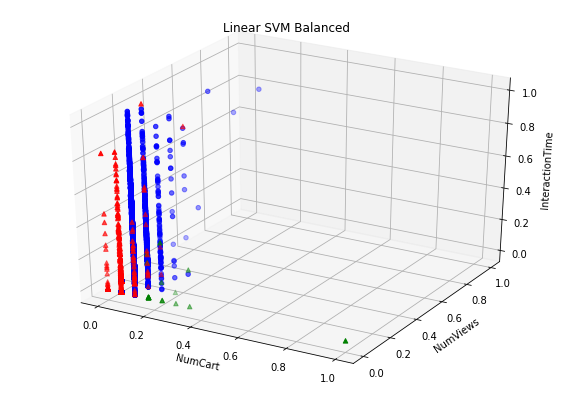

In [43]:
#Generate and evaluate predictions

svm_predb = svmm.predict(X_test_reduced)
cms = confusion_matrix(y_test, svm_predb)
acc = accuracy(y_test, svm_predb)
rec = recall(y_test, svm_predb)
prec = precision(y_test, svm_predb)
f1 = f1_score(y_test, svm_predb)

print(f' Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1 = {f1}')

print('Confusion Matrix is:')
print(cms)
visualize_scatter_plot(X_test_reduced ,y_test,svm_predb,'Linear SVM Balanced')

In [45]:
#Instantiate, train, and predict with the Gradient Boosted Trees model:

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(random_state=1)
gbt_model.fit(X_train_reduced, y_train)
gbt_pred = gbt_model.predict(X_test_reduced)

Accuracy = 0.9990802333791668, Precision = 0.9542857142857143, Recall = 0.9823529411764705, F1-score = 0.9681159420289855
Confusion Matrix is:
[[424136    288]
 [   108   6012]]


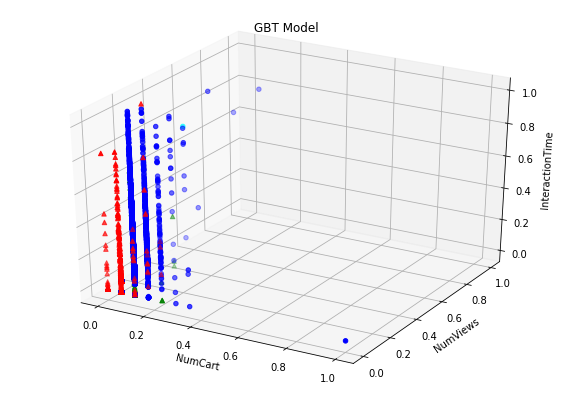

In [47]:
cmgbt = confusion_matrix(y_test, gbt_pred)
acc  = accuracy(y_test, gbt_pred)
rec  = recall(y_test, gbt_pred)
prec = precision(y_test, gbt_pred)
f1   = f1_score(y_test, gbt_pred)

print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmgbt)
visualize_scatter_plot(X_test_reduced,y_test,gbt_pred,'GBT Model')

Accuracy = 0.9980698836820394, Precision = 1.0, Recall = 0.8642156862745098, F1-score = 0.9271627662371812
Confusion Matrix is:
[[424424      0]
 [   831   5289]]


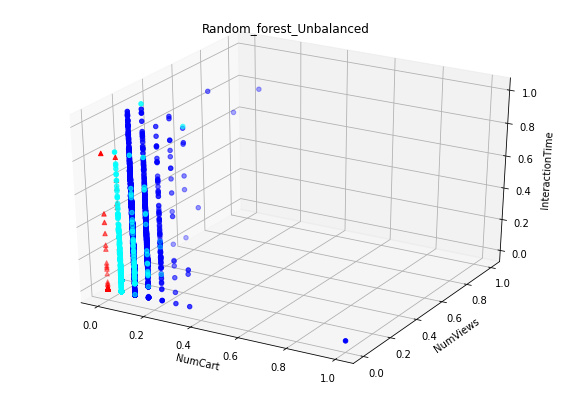

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5)
# Train the classifier
clf.fit(X_train_reduced, y_train)
# Use the classifier to make predictions from the test features
prediction = clf.predict(X_test_reduced)
# Compute the confusion matrix between the true and predicted test targets
cm   = confusion_matrix(y_test, prediction)
# Compute the model's evaluation metrics
acc  = accuracy(y_test, prediction)
rec  = recall(y_test, prediction)
prec = precision(y_test, prediction)
f1   = f1_score(y_test, prediction)


print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)
visualize_scatter_plot(X_test_reduced, y_test, prediction, 'Random_forest_Unbalanced')

Incorporate class-balanced penalty in the gradient boosted model

Accuracy = 0.9975426437251477, Precision = 0.9187624090006619, Recall = 0.9073529411764706, F1-score = 0.9130220322262415
Confusion Matrix is:
[[423933    491]
 [   567   5553]]


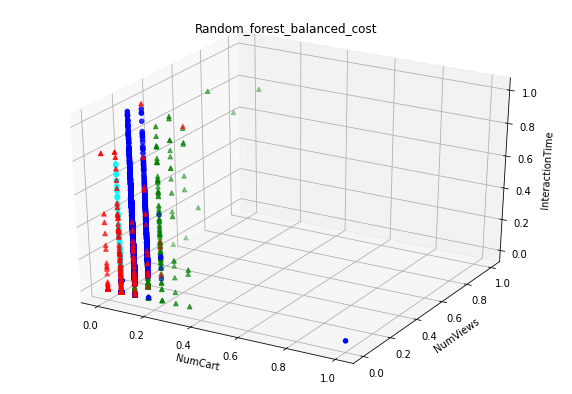

In [49]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced')
# Train the classifier
clf.fit(X_train_reduced, y_train)

prediction = clf.predict(X_test_reduced)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)
# Compute the model's evaluation metrics
acc  = accuracy(y_test, prediction)
rec  = recall(y_test, prediction)
prec = precision(y_test, prediction)
f1   = f1_score(y_test, prediction)

print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)
visualize_scatter_plot(X_test_reduced,y_test,prediction,'Random_forest_balanced_cost')

In [50]:
from sklearn.tree import export_graphviz

export_graphviz(clf.estimators_[0], max_depth=5, out_file='tree.dot', 
                feature_names = selected_columns[:-1],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')